In [17]:
# 1: Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [5]:
# 2: Loading the dataset
df = pd.read_csv("dataset_phishing.csv")

(11430, 89)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent         

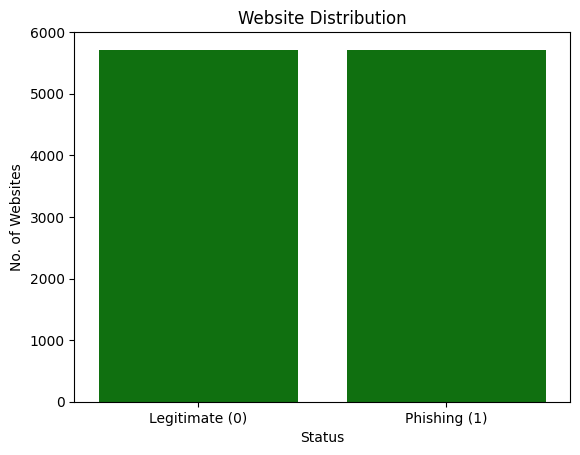

In [6]:
# 3: Overview of the dataset
print(df.shape)
print(df.info())
print(df.describe())
print(df['status'].value_counts())
print(df.columns.tolist())

sns.countplot(x='status', data=df, color= 'green')
plt.title("Website Distribution")
plt.xlabel("Status")
plt.ylabel("No. of Websites")
plt.xticks([0, 1], ['Legitimate (0)', 'Phishing (1)'])
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_15128\3398508528.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


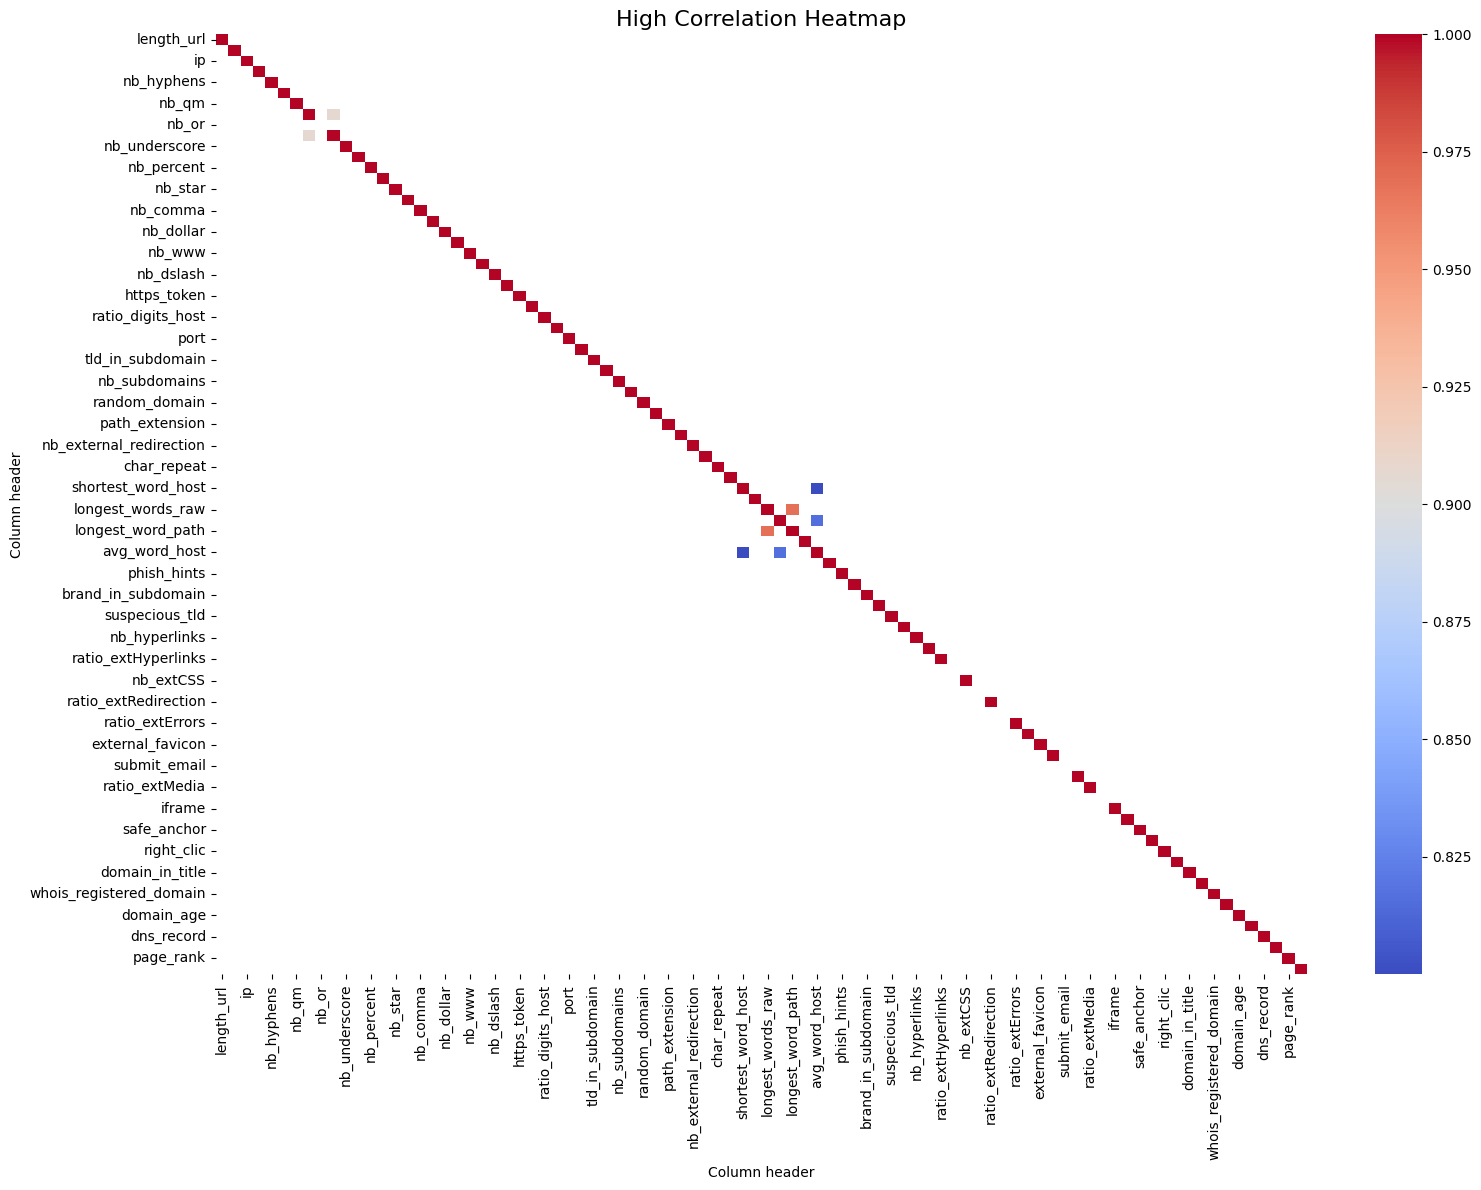

In [7]:
# 4: ploting the correlation map for better knowledge about the dataset
corr = df.corr()
high_corr = corr[(corr > 0.8) | (corr < -0.8)]

plt.figure(figsize=(16, 12))
sns.heatmap(high_corr, cmap='coolwarm', annot=False) 
plt.title("High Correlation Heatmap", fontsize=16)
plt.xlabel("Column header")
plt.ylabel("Column header")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [8]:
# 5: Preparing the x & y cloumn 
X = df.drop(['url', 'status'], axis=1)
y = df['status']


In [9]:

# 6: Spliting the dataset (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# 7: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# 8: Training the model with random forest as it is one of the best model used for regression
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
# 9: calculating the accuracy, precision, recall, f1 score and confusion matrix
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label=1):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label=1):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label=1):.2f}")
print("\nConfusion Matrix: ", confusion_matrix(y_test, y_pred))
print("\nClassification Report: ", classification_report(y_test, y_pred))

Accuracy: 0.97
Precision: 0.98
Recall: 0.96
F1 Score: 0.97

Confusion Matrix:  [[1130   27]
 [  43 1086]]

Classification Report:                precision    recall  f1-score   support

           0       0.96      0.98      0.97      1157
           1       0.98      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



ROC AUC Score: 0.9944742710638751


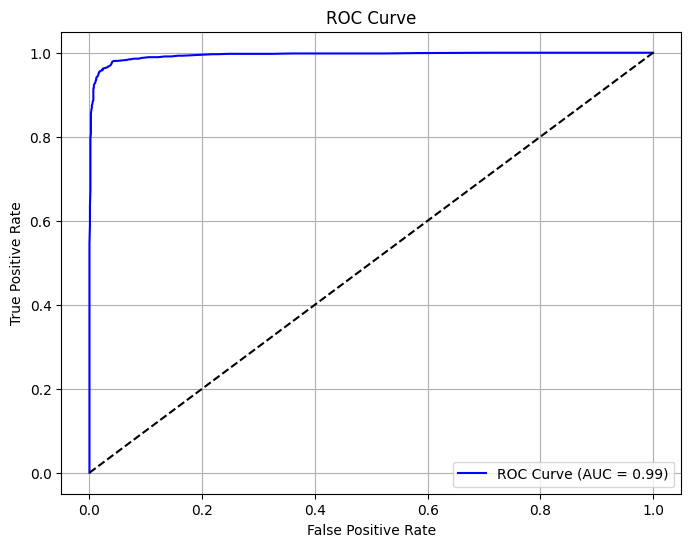

In [ ]:
# 10: calulating ROC curve and evaluation metrics

y_pred = model.predict_proba(X_test)[:, 1]

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()



In [14]:
# 11: predicting from random rows between actual and predicted
sample_indices = np.random.choice(len(X_test), size=5, replace=False)

print("Random sample indices from test set (position within X_test):", sample_indices)

X_sample = X_test[sample_indices]
y_sample_actual = y_test.iloc[sample_indices]  
y_sample_pred = model.predict(X_sample)

label_map = {0: 'Legitimate', 1: 'Phishing'}

for i, idx in enumerate(sample_indices):
    print(f"Sample {i+1} (Test set position: {idx}):")
    print(f"  Actual:   {label_map[y_sample_actual.iloc[i]]}")
    print(f"  Predicted:{label_map[y_sample_pred[i]]}")
    print()


Random sample indices from test set (position within X_test): [1262 1524  692  564 2233]
Sample 1 (Test set position: 1262):
  Actual:   Phishing
  Predicted:Phishing

Sample 2 (Test set position: 1524):
  Actual:   Phishing
  Predicted:Phishing

Sample 3 (Test set position: 692):
  Actual:   Legitimate
  Predicted:Legitimate

Sample 4 (Test set position: 564):
  Actual:   Legitimate
  Predicted:Legitimate

Sample 5 (Test set position: 2233):
  Actual:   Phishing
  Predicted:Phishing



In [19]:
import joblib

# Save the model
joblib.dump(model, "phishing_model.pkl")
print("Model saved as phishing_model.pkl")


Model saved as phishing_model.pkl
